## Create a stitched panorama from multiple overlapping images.

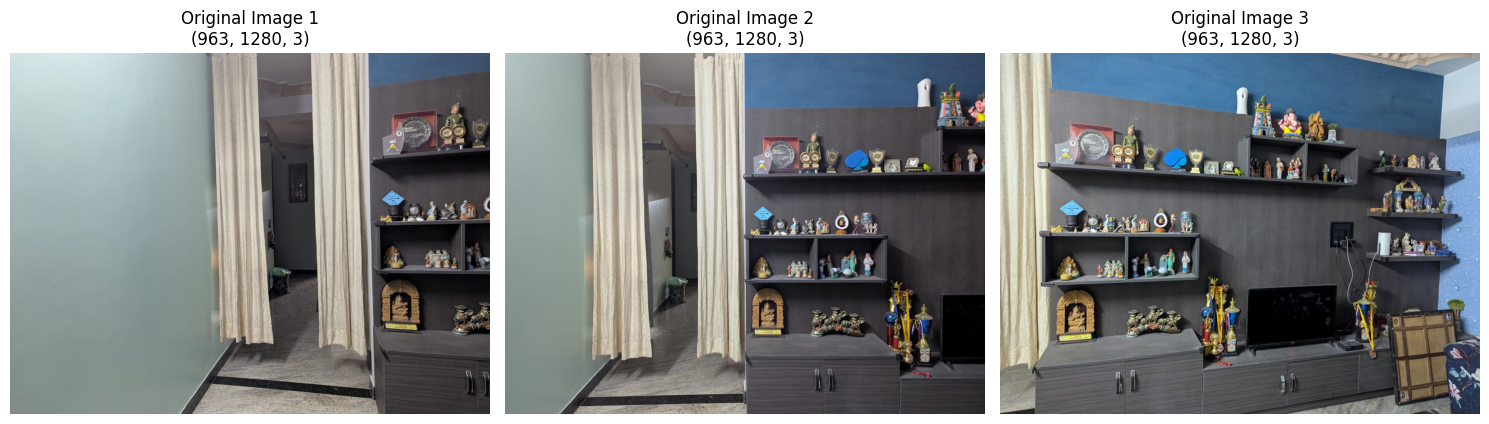

Visualizing keypoints...
Total keypoints: 11459
Average keypoints per image: 3819.7


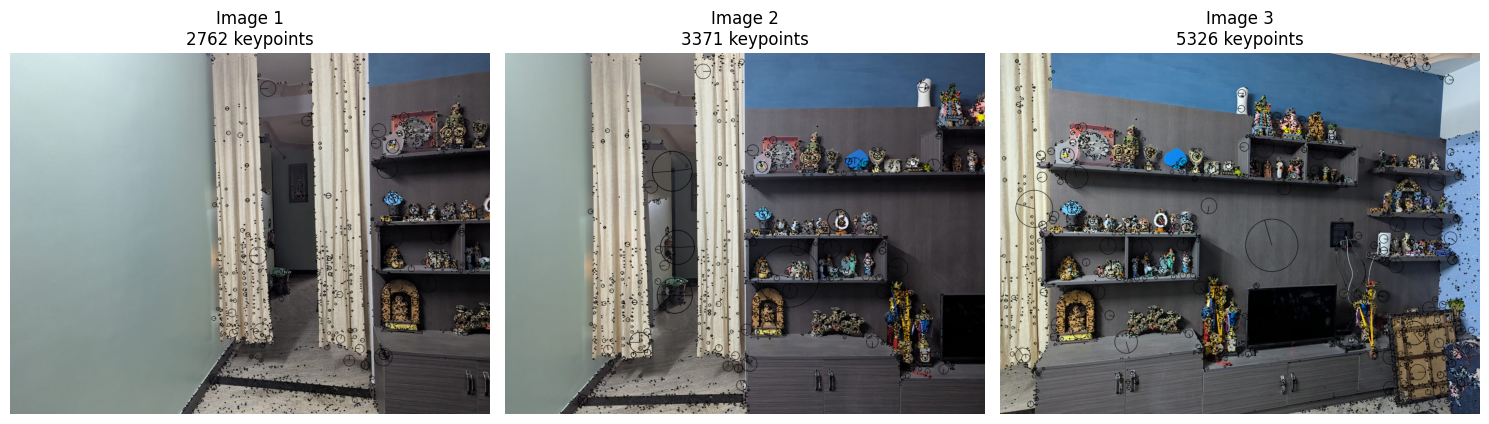

Panorama stitching successful


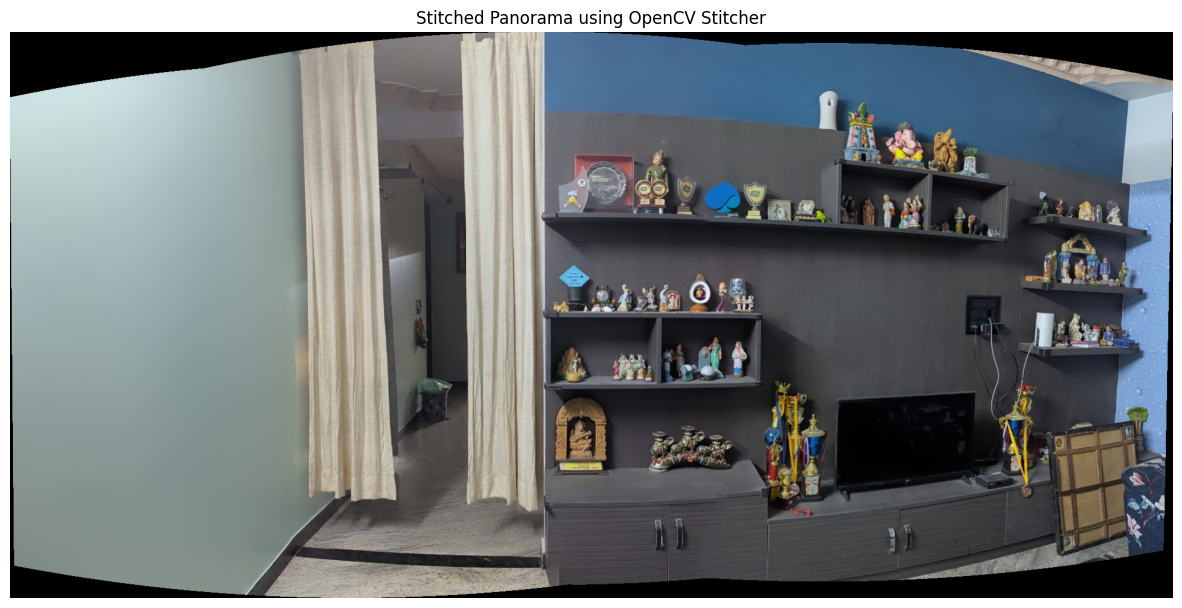

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_images(image_paths):
    """Load images from given paths."""
    images = []
    for path in image_paths:
        img = cv2.imread(path)
        if img is not None:
            images.append(img)
        else:
            print(f"Error: Image at path '{path}' failed to load.")
    return images

def visualize_images(images):
    """Visualize original images."""
    plt.figure(figsize=(15, 5))
    for i, img in enumerate(images):
        plt.subplot(1, 3, i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f'Original Image {i+1}\n{img.shape}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def draw_keypoints(images, sift):
    """Detect and draw keypoints on images."""
    plt.figure(figsize=(15, 5))
    total_keypoints = 0

    for i, img in enumerate(images):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        keypoints, _ = sift.detectAndCompute(gray, None)

        num_keypoints = len(keypoints)
        total_keypoints += num_keypoints

        img_with_keypoints = cv2.drawKeypoints(img, keypoints, None,
                                             color=(0, 0, 0),
                                             flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

        img_with_keypoints_rgb = cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB)

        plt.subplot(1, 3, i+1)
        plt.imshow(img_with_keypoints_rgb)
        plt.title(f'Image {i+1}\n{num_keypoints} keypoints')
        plt.axis('off')

    plt.tight_layout()
    print(f"Total keypoints: {total_keypoints}")
    print(f"Average keypoints per image: {total_keypoints/len(images):.1f}")
    plt.show()

def stitch_panorama(images):
    """Stitch images into panorama using OpenCV Stitcher."""
    stitcher = cv2.Stitcher.create(mode=cv2.Stitcher_PANORAMA)
    status, panorama = stitcher.stitch(images)

    if status == cv2.Stitcher_OK:
        print('Panorama stitching successful')
        return panorama
    else:
        print(f'Panorama stitching failed with status code: {status}')
        return None

def save_and_display_panorama(panorama, output_path):
    """Save and display the panorama."""
    if panorama is not None:
        cv2.imwrite(output_path, panorama)
        plt.figure(figsize=(15,10))
        plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB))
        plt.title('Stitched Panorama using OpenCV Stitcher')
        plt.axis('off')
        plt.show()

def main():
    # Define image paths
    image_paths = [
        'path/to/image1.jpg',
        'path/to/image2.jpg',
        'path/to/image3.jpg'
    ]

    # Load images
    images = load_images(image_paths)
    if not images:
        print("No images loaded. Exiting.")
        return

    # Visualize original images
    visualize_images(images)

    # Initialize SIFT and detect keypoints
    sift = cv2.SIFT_create(contrastThreshold=0.04)
    print("Visualizing keypoints...")
    draw_keypoints(images, sift)

    # Create panorama
    panorama = stitch_panorama(images)

    # Save and display result
    if panorama is not None:
        save_and_display_panorama(panorama, 'output/panorama.jpg')

if __name__ == "__main__":
    main()